## МАТЕРИАЛЫ

[ПРЕЗЕНТАЦИЯ](https://disk.yandex.ru/i/tAGuJd0AoCE20A)

[ДАШБОРД](https://public.tableau.com/app/profile/olesya.bondarenko8784/viz/DashboardBANK/Dashboard1?publish=yes)

# БАНК - АНАЛИЗ ОТТОКА КЛИЕНТОВ

Поставлена задача отделом маркетинга: максимально эффективно выделить сегменты отточных клиентов, что бы они были однородными, высокооточными и покрывали максимум проблемных зон банка. Таким образом, маркетинговое воздействие на эти сегменты должно приветсти к уменьшению.

Такая необходимость возникла после драматического повышения оттока, возникла проблема, угрожающая дальнейшей работе банка.

По условиям поставленной задачи были выделены следующие шаги исследования:

1. Загрузить данные по клиентам банка и подготовить к исследованию

- проверить наименование столбцов и привести к приемлимому, в случае необходимости;

- просмотреть данные с помощью гистограмм и понять возможные ошибки в данных;

- проверить данные на пропуски и определить их значимость;

- проверить данные на дубликаты

2. Проведем исследовательский анализ данных

- изучим каждый столбец с данными и определим общий портрет клиента банка;

- изучим данные по столбцу "churn" по средним и медиальным значениям;

- определим функцию для построения гистограмм по данным оттока по всем остальным параметрам по нормализованным данным;

- определим сигменты, объединяя признаки отточности

- изучим корреляцию данных для ушедших из банка клиентов

- сформулируем и проверим следующие гипотезы:

Первая:

Нулевая гипотеза H0 - "Нет оснований считать,что доходы между теми клиентами, которые ушли и теми, которые остались, разные"

Альтернативная гипотеза Н1 - "Доходы между теми клиентами, которые ушли и теми, которые остались, разные"

Вторая:

Нулевая гипотеза H0 - "Нет оснований считать,что скоринг между теми клиентами, которые ушли и теми, которые остались, разный"

Альтернативная гипотеза Н1 - "Скоринг между теми клиентами, которые ушли и теми, которые остались, разный"

3. По полученным данным, предоставим выводы о том, какие признаки стратегическим образом влияют на отток и какие значения этих признаков связаны с оттоком. Предположим варианты выхода из сложившейся кризисной ситуации.


# ШАГ 1 ПОДГОТОВКА ДАННЫХ К ИССЛЕДОВАНИЮ

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings; warnings.filterwarnings(action = 'ignore')

from scipy import stats as st
from plotly import graph_objects as go
from IPython.display import set_matplotlib_formats
from pandas.plotting import register_matplotlib_converters


!pip install phik

import phik
from phik.report import plot_correlation_matrix
from phik import report
from phik import resources


In [2]:
# чтение файла с данными 

bank = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')


Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB



array([[<AxesSubplot:title={'center':'USERID'}>,
        <AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'equity'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'products'}>],
       [<AxesSubplot:title={'center':'credit_card'}>,
        <AxesSubplot:title={'center':'last_activity'}>,
        <AxesSubplot:title={'center':'EST_SALARY'}>],
       [<AxesSubplot:title={'center':'churn'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

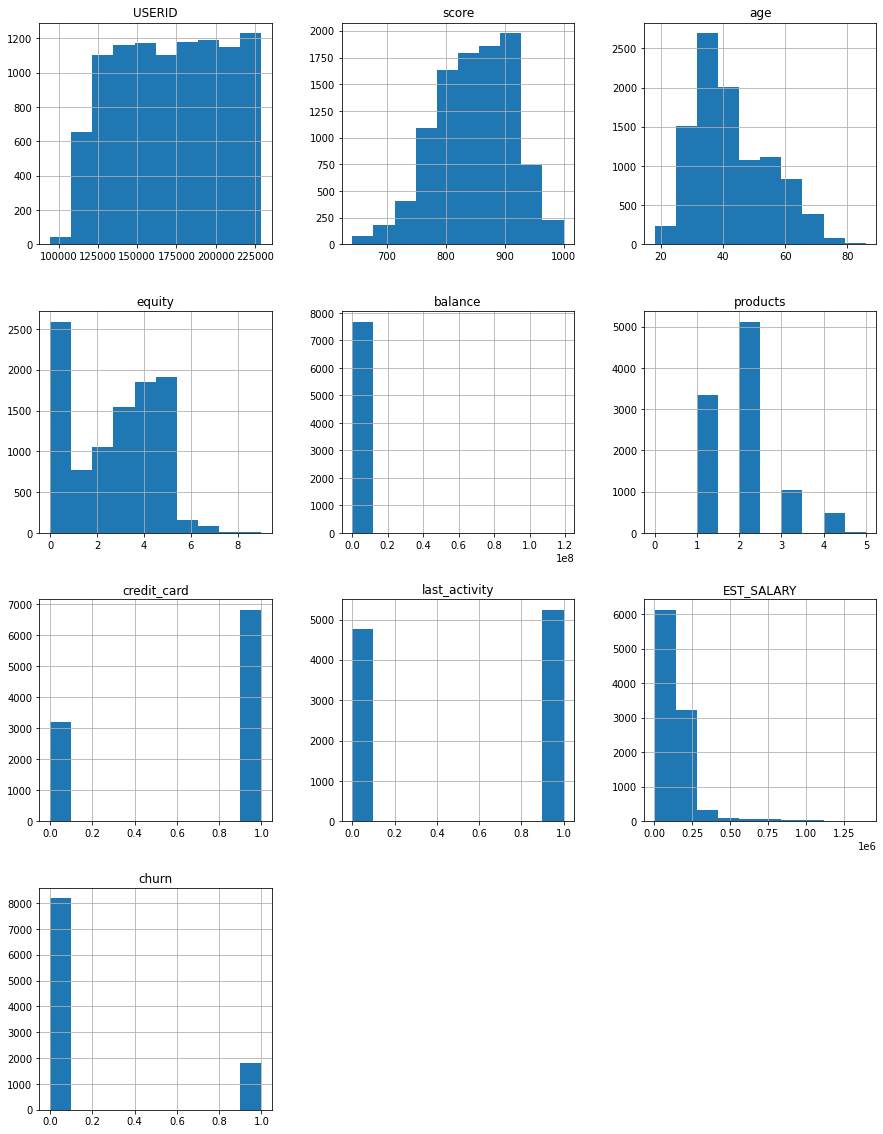

In [3]:
# изучим данные 

bank.info()
print('')
bank.hist(figsize=(15, 20))

<div class="alert alert-success">
<b>👍 Успех:</b> Есть описание задачи, план реализации проекта, импортированы нужные библиотеки, датасет загружен и просмотрен
</div>

Нам представлен файл с 10000 строками, 12 столбцами:

userid — идентификатор пользователя,

score — баллы кредитного скоринга,

City — город,

Gender — пол,

Age — возраст,

equity — количество баллов собственности,

Balance — баланс на счёте,

Products — количество продуктов, которыми пользуется клиент,

CreditCard — есть ли кредитная карта,

Loyalty / last_activity — активный клиент,

estimated_salary — заработная плата клиента,

Churn — ушёл или нет.

Сразу видим неверный формат в наименованиях столцов. Приведем все наименования к нижнему регистру и переименуем столбец USERID.

In [4]:
# приведем названия столбцов к нижнему регистру, изменим названия на приемлемые:
bank.columns = bank.columns.str.lower()
bank = bank.rename(columns={'userid' : 'user_id'})
bank.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

По гистограммам мы уже можем отметить:

- низкий уровень скорринга присвоен небольшому количеству клиентов. Это мы посмотрим в дальнейшем исследовании предметно и в цифрах. Это означает, что основной портрет клиента банка - финансово ответственный и "интересный" для банка потребитель;

- основная возрастная группа потребителей банковских продуктов - это 30-45 лет. Отмечаются клиенты и за 80 лет, что наводит на мысль посмотреть на аномальные значения по данной группе;

- количество баллов собственности низкий у максимально большой группы клиентов, но по общей базе клиентов преобладают оценки 2-5. Максимальная оценка 8-9 баллов не достигается. Это может нам характеризовать клиентов, как средне-статистически состоятельных, но не подходящих под признаки "богатых";

- баланс нам ничего не скажет особенного

- количество используемых продуктов банка клиентами в основной массе составлял 2 продукта, далее большинсов использовало только 1 продукт банк, а вот 3-4-5 было у редкостью. Этот парамент нам может помочь в исследовании оттока клиентов;

- большая часть клиентов использовала кредитную карту;

- активность клиентов, как потребителей продукции банка, была тоже выше, но не решающе в сравнении с клиентами, опередедленными в группу "неактивный";

- заработная плата удивила своим высоким показателем, при утановленном прожиточном минимуме в регионе в размере 13890р. Изучим в дальнейшем на выбросы.


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [5]:
# посмотрим на часть данных и проверим на наличие дубликатов

display(bank.head(10))
print("____________________________________________________________________________")
print('Явных дубликатов:')
print(bank.duplicated().sum())


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


____________________________________________________________________________
Явных дубликатов:
0


<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [6]:
# посмотрим наличие пропусков
pd.DataFrame(round(bank.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.000000
equity,0.000000
balance,23.000000
products,0.000000
credit_card,0.000000
last_activity,0.000000


По столбцу balance мы имеем пропущенные данные. Заполнять их самостоятельно будет некорректно. Их количество крайне несущественно. Можно просто оставить, как есть. это не помешает нашему дальнейшему исследованию.

In [7]:
# изучим столбец "user_id"

print('Количество уникальных значений:', bank['user_id'].unique().shape[0])

Количество уникальных значений: 9927


Видим, что не все 10000 уникальны. Посмотрим подробнее.

In [8]:
# изучим неявные дубликаты в столбце "user_id"
bank[bank['user_id'].duplicated(keep=False)].sort_values(by='user_id').head(1000)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2597,226719,990.0,Ярославль,М,37.0,4,14648692.14,2,0,0,934412.61,1
8205,227795,840.0,Рыбинск,М,34.0,2,350768.03,1,1,0,102036.14,1
8497,227795,839.0,Ярославль,М,34.0,2,326593.14,2,1,0,103314.92,0
6457,228075,839.0,Рыбинск,М,39.0,5,507199.85,3,0,1,85195.80,0


Видим 73 повтора id, но с совершенно различными остальными данными. Можем предположить, что были "слиты" две ранее независимые базы клиентов по Ярославлю и Рыбинску в одну, поэтому и произошло задвоение номера. Оставим данные дубликаты без изменений. Будет крайне неккорекно для нашего исследования их удалять.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [9]:
# рассмотрим какие города нам представлены

bank['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

Основная часть клиентов из Ярославля (5888 потребителей), Рыбинск - 2695 клиентов, Ростов - 1417.

In [10]:
# рассмотрим количество клиентов с гендерной точки зрения

bank['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

Как видим, существенного преимущества мужчины или женщины являются клиентами банка, нет. 5005 человек - мужского пола, 4995 - женского.

In [11]:
# рассмотрим какой возраст представлен

bank['age'].value_counts()

36.0    414
37.0    402
33.0    392
35.0    388
34.0    384
       ... 
83.0      3
82.0      2
84.0      2
86.0      2
79.0      2
Name: age, Length: 68, dtype: int64

Как помним по гистограмме, возраст превышем 80+. Посмотрим "ящик с усами"

In [14]:
# посмотрим какое количество продуктов банка чаще использовались клиентами 

bank['products'].value_counts()

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

Половина клиентов использовала 2 продукта банка, около менее одной третей - только одним видом, а вот 3 и более составили менее 20% от общего количества клиентов банка.

In [15]:
bank = bank[bank["products"] != 0] 
print('Количество строк после удаления:', len(bank))

Количество строк после удаления: 9999


In [16]:
# изучим столбец est_salary (уже с предчувствием)

bank['est_salary'].describe()

count    9.999000e+03
mean     1.478792e+05
std      1.393901e+05
min      2.546300e+03
25%      7.525212e+04
50%      1.196615e+05
75%      1.745011e+05
max      1.395064e+06
Name: est_salary, dtype: float64

Удивительный максимум в размере выше 1395064 р. Все же допустим, что это реальная зп, отдельно уполномоченного лица. Минимум в 2546р допускаем, возможны получения пособий или работа по пол-ставки. 

In [19]:
# изучим сколько клиентов пользовались/не пользовались кредитными картам

bank['credit_card'].value_counts()

1    6804
0    3195
Name: credit_card, dtype: int64

Большая половина клиентов имели кредитную карту. Данная услуга была популярна в банке.

In [20]:
# посмотрим активность клиентов

bank['last_activity'].value_counts()

1    5235
0    4764
Name: last_activity, dtype: int64

Практически 50 на 50 по активности или не активности использования банковских продуктов клиенты банка. Данная оценка не дает нам определенной характеристики для составления портрета клиента банка. Можем с большооооой натяжкой все же определить, что основной клиент был все же активным.

In [21]:
# как распределилось количество клиентов по условию ушли(1)/остались(0)

bank['churn'].value_counts()

0    8180
1    1819
Name: churn, dtype: int64

Основная часть все же остались клиентами банка. Но 22% является существенным показателем для оттока. Теперь на количественном уровне мы видим маштаб бедствия и причины поставленной нам задачи.


Мы получили и изучили на предмет ошибок или аномалий данные по клиентам банка. 

Привели в соответствие визуальный ряд. Убрали выбросы в данных по возрасту и заработной плате и узнали следующее:

- основная часть клиентов - ярославцы (5888 потребителей), из Рыбинска - 2695 клиентов, из Ростова - 1417.

- существенного преимущества мужчины или женщины являются клиентами банка, нет. 5005 человек - мужского пола, 4995 - женского.

- половина клиентов использовала 2 продукта банка, около менее одной третей - только одним видом, а вот 3 и более составили менее 20% от общего количества клиентов банка.

- в ярославской области у клиентов банка отличная и по меркам Московской области, а может и Москвы, заработная плата (апплодисменты).

- большая половина клиентов (6464 человека) имели кредитную карту. Данная услуга была популярна в банке.

- основной клиент банка все же лоялен и был активным пользователем банковских продокутов.

- 22% отказалось от обслуживания в банке и ушли.

 <div class="alert alert-success">
 <b>👍 Успех:</b> Все верно!
 </div>



# ШАГ 2 ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ


Первым моментом для исследования приходит в голову, а не зря ли определен скорринг "плохо" или "очень плохо". Изучим, сколько клиентов банка имели такие характеристики.

In [22]:
# изучим вопрос у кого показатель скоринга был менее 720 баллов

(bank[bank['score'] < 720]).describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,309.000000,309.000000,306.000000,309.000000,10.000000,309.000000,309.000000,309.000000,3.090000e+02,309.000000
mean,170461.440129,690.297735,42.330065,0.097087,208154.316000,1.207120,0.996764,0.598706,2.018783e+05,0.006472
std,33335.180459,22.259290,12.129582,0.391000,213187.441127,0.444097,0.056888,0.490955,1.779400e+05,0.080321
min,114347.000000,642.000000,20.000000,0.000000,20.000000,1.000000,0.000000,0.000000,1.716290e+04,0.000000
25%,142546.000000,670.000000,33.000000,0.000000,26468.620000,1.000000,1.000000,0.000000,1.132438e+05,0.000000
50%,173616.000000,697.000000,39.000000,0.000000,184345.980000,1.000000,1.000000,1.000000,1.603696e+05,0.000000
75%,196174.000000,708.000000,50.000000,0.000000,320897.087500,1.000000,1.000000,1.000000,2.279496e+05,0.000000
max,229145.000000,719.000000,81.000000,3.000000,666680.810000,3.000000,1.000000,1.000000,1.180070e+06,1.000000


Как видим, это только 285 человек из всего количества наших клиентов. Низкий балл не является ключевой причиной оттока клиентов. Это чуть менее 3% от всей потребительской базы. 

In [23]:
# сравним средние и медианные значения для churn

print('СРЕДНИЕ ЗНАЧЕНИЯ')
display(bank.groupby('churn').agg('mean'))
print('_________________________________________________________________________________________________________________')
print('МЕДИАННЫЕ ЗНАЧЕНИЯ')
display(bank.groupby('churn').agg('median'))

СРЕДНИЕ ЗНАЧЕНИЯ


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary
churn,,,,,,,,,
0,172004.359046,845.428362,43.020846,2.374817,7.339826e+05,1.757579,0.709169,0.483741,147783.200108
1,170975.058824,863.346894,41.429593,3.764156,1.133993e+06,2.377130,0.551402,0.702584,148310.728202


_________________________________________________________________________________________________________________
МЕДИАННЫЕ ЗНАЧЕНИЯ


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary
churn,,,,,,,,,
0,173218,848.0,40.0,3,475382.445,2,1,0,118257.715
1,170532,866.0,39.0,4,782410.470,2,1,1,125395.220


По средним значениям, клиенты 41 года склонны к уходу, которые использовали 2 и более продуктов банка и с приличной для региона заработной платой, Медианным данные дают нам портрет "клиентаоттока", как 39 летнего, пользующегося так же двумя видами банковских продуктов и с приличной заработной платой и кредитной картой. 

Построим гисторгаммы для понимания количества клиентов для оттока по предоставленным нам данным в столбцах.

Для изучения этого вопроса определим функцию и нормализуем данные для информативности.

In [24]:
# определим функцию для построения гистограмм по данным оттока по всем остальным параметрам по нормализованным данным

def plot(bank, column):
    fig, ax = plt.subplots(figsize = (10, 5))
    
    sns.histplot(bank[bank['churn']==0][column], color = 'g', label = 'остались', stat = 'density', common_norm=False)
    sns.histplot(bank[bank['churn']==1][column], label = "ушли", stat = 'density', common_norm=False)
    plt.xlabel('')
    plt.ylabel('количество пользователей')
    plt.legend()
    plt.show()

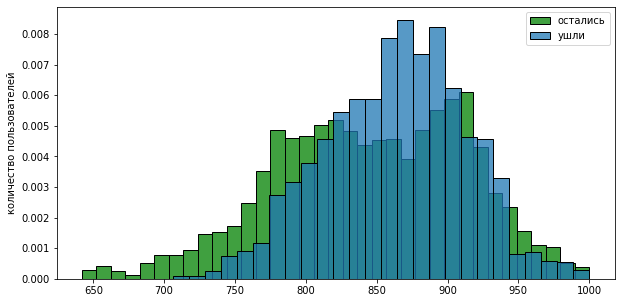

In [25]:
# churn - score

plot(bank, "score")

Как видим, уходили клиенты с высоким скорингом от 800 до 900 и их количество так же дает нам информацию для формирования сигментации по данному параметру. Количество ушедших клиентов превышло 500 человек. 

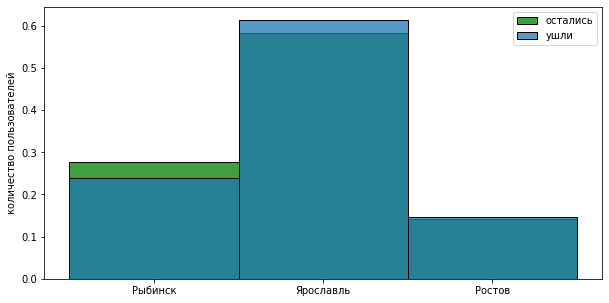

In [26]:
 # chure - city
    
plot(bank, "city")

Основной отток произошел в филиале Ярославля. И опять же количество ушедших дает нам иформация о возможности сигментировать и по признаку "город".

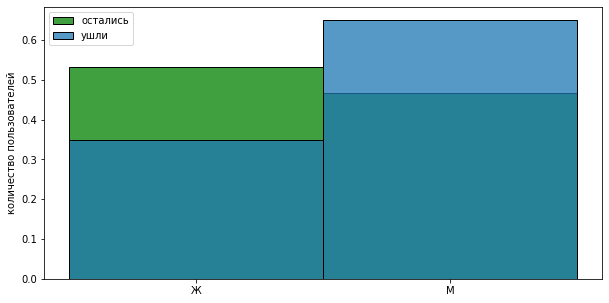

In [27]:
# chure - gender

plot(bank, "gender")

Еще один показатель - ушедших мужчин больше.

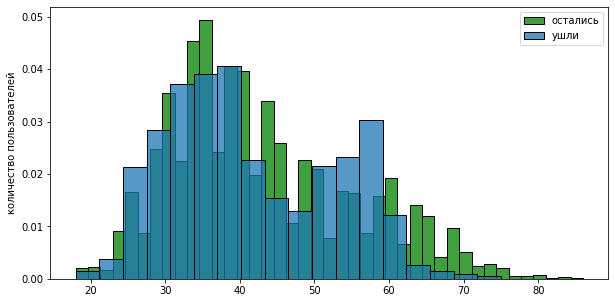

In [28]:
# chure - age

plot(bank, "age")

По данному параметру у нас не достогается условие по численности группы для сигментации. Все же менее 500 мы видим максимальное достижение оттока. 

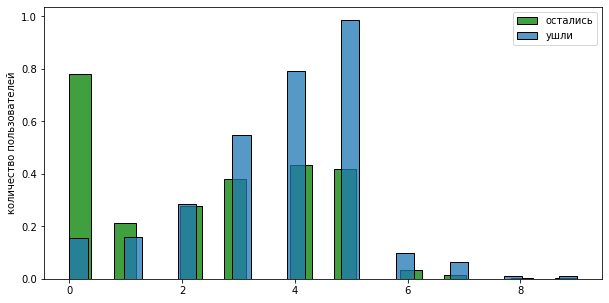

In [29]:
# chure - equity

plot(bank, "equity")

Количество баллов собственности добавили нам параметр для характеристики "клиентаоттока". Клиенты с показателями по собственности 3 и выше склонны к прекращению обслуживаться в банке (😜 чем нищеброды).

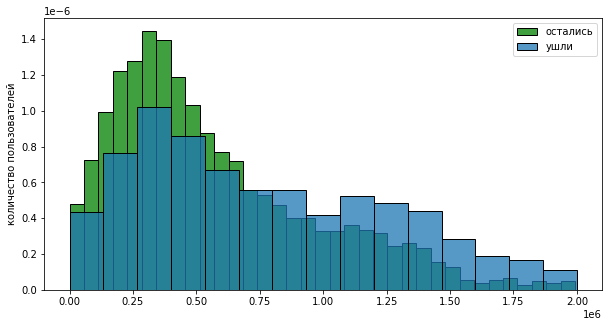

In [30]:
# chure - balance

bank_balance = bank[bank['balance'] < 2000000]

plot(bank_balance, "balance")

Уходили клиенты с высокими остатками на балансе. Категоричны были клиенты с остатками свыше 750000. 

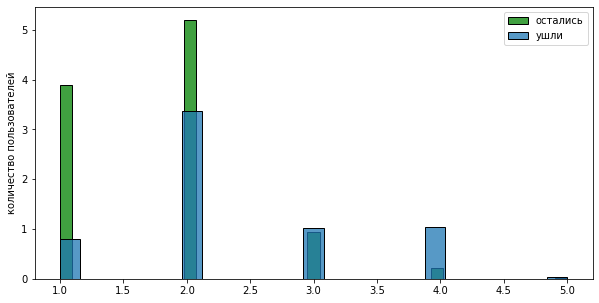

In [31]:
# churn - products

plot(bank, "products")

Все же уходили клиенты, которые соглашались изначально на 3 и более продуктов банка.

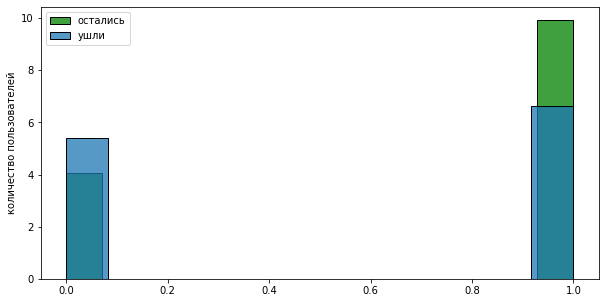

In [32]:
# churn - credit_card

plot(bank, "credit_card")

Клиенты без кредитной карты уходили с большим удовольствием, чем с.

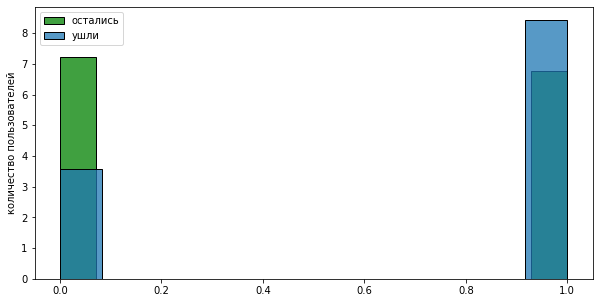

In [33]:
# churn - last_activity

plot(bank, "last_activity")

Чего то не выдерживали и отказывались от обслуживания именно активные клиенты банка.

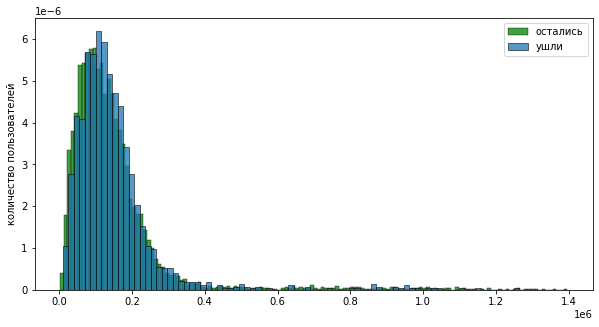

In [34]:
# churn - est_salary

plot(bank, 'est_salary')

И опять же получили подтверждение, что у клиентов оттока были приличные доходы и их уход все же не безразличен в доходно-эффективной работе банка.

In [35]:
# изучим матрицу корреляции 

bank.phik_matrix()

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
user_id,1.000000,0.064643,0.034170,0.059734,0.000000,0.073403,0.034065,0.105967,0.035747,0.065835,0.000000,0.139641
score,0.064643,1.000000,0.091698,0.071596,0.037213,0.528118,0.170900,0.419572,0.208941,0.054361,0.396156,0.228260
city,0.034170,0.091698,1.000000,0.012645,0.093407,0.063448,0.039968,0.124901,0.074782,0.030637,0.171413,0.017054
gender,0.059734,0.071596,0.012645,1.000000,0.285744,0.064360,0.045424,0.072036,0.196043,0.014404,0.144628,0.219184
age,0.000000,0.037213,0.093407,0.285744,1.000000,0.043097,0.024989,0.141220,0.156734,0.089580,0.358130,0.183435
equity,0.073403,0.528118,0.063448,0.064360,0.043097,1.000000,0.000000,0.584444,0.221871,0.050997,0.286410,0.352737
balance,0.034065,0.170900,0.039968,0.045424,0.024989,0.000000,1.000000,0.000000,0.000000,0.000000,0.374373,0.024701
products,0.105967,0.419572,0.124901,0.072036,0.141220,0.584444,0.000000,1.000000,0.271101,0.112509,0.223097,0.260106
credit_card,0.035747,0.208941,0.074782,0.196043,0.156734,0.221871,0.000000,0.271101,1.000000,0.050021,0.038139,0.202586
last_activity,0.065835,0.054361,0.030637,0.014404,0.089580,0.050997,0.000000,0.112509,0.050021,1.000000,0.046165,0.261583


Высоких и явных зависимостей оттока мы не наблюдаем. Так видели ранее другими методами, остается влияние сколькими видами пользуется клиент продуктами банка, далее идет оценка собственности клиента, его активность и скорринг. 

interval columns not set, guessing: ['user_id', 'score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


<AxesSubplot:>

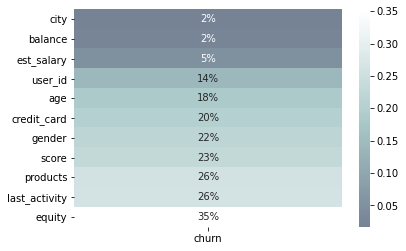

In [36]:
# для презентации построим корреляцию только для churn

sns.heatmap(bank.phik_matrix().loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt = '.0%', cmap ='bone', center=0)

Сформулируем и проверим следующие гипотезы:

Проверка первой гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.

Сформулируем гипотезы H0 и H1.

Нулевая гипотеза H0 - "Нет оснований считать,что доходы между теми клиентами, которые
ушли и теми, которые остались, разные"

Альтернативная гипотеза Н1 - "Доходы между теми клиентами, которые
ушли и теми, которые остались, разные"

In [37]:
sample_1 = bank[bank['churn']==1]['est_salary'] # доход тех кто ушёл
sample_2 = bank[bank['churn']==0]['est_salary'] # и тех кто остался

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Доходы между теми клиентами, которые ушли и теми, которые остались, разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Нет оснований считать,что доходы между теми клиентами, которые ушли и теми, которые остались, разные")

p-значение: 0.8839364433181659
Не получилось отвергнуть нулевую гипотезу. Нет оснований считать,что доходы между теми клиентами, которые ушли и теми, которые остались, разные


Проверка гипотезы различия скоринга между теми клиентами, которые ушли и теми, которые остались.

Сформулируем гипотезы H0 и H1 для анализа долей:

Нулевая гипотеза H0 - "Скоринг между теми клиентами, которые ушли и теми, которые остались, одинаковый"

Альтернативная гипотеза Н1 - "Скоринг между теми клиентами, которые ушли и теми, которые остались, разный"

In [38]:
sample_1 = bank[bank['churn']==1]['score'] # скоринг тех кто ушёл
sample_2 = bank[bank['churn']==0]['score'] # скоринг тех кто остался

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Скоринг между теми клиентами, которые ушли и теми, которые остались, разный")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Скоринг между теми клиентами, которые ушли и теми, которые остались, одинаковый")

p-значение: 3.27354226117341e-26
Отвергаем нулевую гипотезу. Скоринг между теми клиентами, которые ушли и теми, которые остались, разный


In [39]:
sample_1 = bank[bank['last_activity']==1]['est_salary'] # доход активных клиентов
sample_2 = bank[bank['last_activity']==0]['est_salary'] # и тех кто пассивно был клиентом банка

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Доходы между теми клиентами, которые пользовались активно банковскими услугами и были пассивными клиентами, разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Доходы между теми клиентами, которые пользовались активно банком и пассивные клиенты, одинаковые")

p-значение: 0.7682880362957542
Не получилось отвергнуть нулевую гипотезу. Доходы между теми клиентами, которые пользовались активно банком и пассивные клиенты, одинаковые


Подведем итоги нашего исследования. Мы выяснили, что:

- уходили из банка не только клиенты с низким баллом скоринга. В основном это были люди с "великолепной" оценкой;

- основной отток произошел в филиале Ярославля;

- мужчины чаще отказывались от обслуживания;

- клиенты с показателями по собственности 3 и выше покидали банк решительнее;

- клиенты с высокими остатками на балансе составляли отток;

- уходили клиенты, которые соглашались на обслуживание с 3 и более продуктами банка, но кредитными картами в основном не пользовались;

- не выдерживали и отказывались от обслуживания именно активные клиенты банка;

- у клиентов оттока были приличные доходы.

По средним значениям, склонны к уходу клиенты 41 года, которые использовали 2 и более продуктов банка и с приличной для региона заработной платой. Медианные данные дают нам портрет "клиентаоттока", как 39 летнего, пользующегося так же двумя видами банковских продуктов и с приличной заработной платой и кредитной картой. 

Получаем какой портрет "ушедшего клиента": мужчина 39-41 года с высоким доходом и остатками на счетах, открытый для использования банковскими продуктами, выскокой оценкой по собсвенности и с отличными балами скоринга.

Уходили "идеальные" клиенты банка.

Это возможно только в случаях отвратительного технического обслуживания и клиентской поддержки в банке. Если банк не в состоянии технически обеспечить бесперебойное и круглосуточное обслуживание клиента. Высокий уровень дохода нам говорит, что клиенты являлись предпринимателями и владельцами бизнесов, соответственно, необходимо проверить технические возможности для использования в круглосуточном режиме банковские услуги для юридических лиц. Инкассация, прием платежей, оплата счетов без привязки и ограничения по времени. Обратить внимание на тарифы обслуживания юридических лиц. Предложить клиентам пакетные обслуживания с льготными тарифами и бесплатным обслуживание на определнный срок, для клиентов, которые вернутся обратно. Рассмотреть дополнительные услуги или возможности по оперативной помощи в бизнесе, к примеру, страхование ответственности, если клиент сам предоставляет услуги физическим лицам, или помощь в ведении бухгалтерской отчетности. 
 
 
 


Определим сегменты по возрасту (у нас высокий отток был представлен клиентами в возрасте от 50 до 60), количеству используемых продуктов банка, баллами собственности и последней активностью.  

In [40]:
bank_age= bank.query('50 <= age <= 60')

In [41]:
segments1 = bank_age.groupby('equity').agg({'user_id': 'count','churn': 'sum'}).reset_index()
segments1['percent_churn'] = round(segments1['churn']/segments1['user_id']*100)
segments1

,equity,user_id,churn,percent_churn
0,0,412,22,5.0
1,1,140,29,21.0
2,2,184,48,26.0
3,3,281,93,33.0
4,4,333,110,33.0
5,5,369,144,39.0
6,6,30,12,40.0
7,7,13,7,54.0
8,8,5,3,60.0
9,9,1,0,0.0


Явных сегментов оттока мы не определили у сочетания age-equity. Численность групп не допустима по ТЗ. Сгруппировав equity, мы исправим это положение и сможем определить высокоотточные группы клиентов в возрасте от 50 до 60 лет с собственностью, оцененной в 4-5 баллов (702 клиента, 36.18% оттока)

In [42]:
segments2 = bank_age.groupby('products').agg({'user_id': 'count','churn': 'sum'}).reset_index()
segments2['percent_churn'] = round(segments2['churn']/segments2['user_id']*100)
segments2

,products,user_id,churn,percent_churn
0,1,513,53,10.0
1,2,963,261,27.0
2,3,205,92,45.0
3,4,85,62,73.0
4,5,2,0,0.0


В данном сочетании мы видим, что высокоотточной группой можно назвать клиентов в возрасте от 50 до 60 лет, которые использовали 2 банковских продукта (963 клиента, 27% оттока)

In [43]:
segments3 = bank_age.groupby('last_activity').agg({'user_id': 'count','churn': 'sum'}).reset_index()
segments3['percent_churn'] = round(segments3['churn']/segments3['user_id']*100)
segments3

,last_activity,user_id,churn,percent_churn
0,0,848,168,20.0
1,1,920,300,33.0


При этом активные клиенты в возрасте от 50 до 60 лет и уходили активнее (33% оттока), чем не активные (20%).

Таким образом, мы определили 3 сегмента высокоотточных клиентов банка:

- клиенты в возрасте от 50 до 60 лет с собственностью, оцененной в 4-5 баллов (702 человека, 36.18% оттока);

- клиенты в возрасте от 50 до 60 лет, которые использовали 2 банковских продукта (963 человека, 27% оттока);

- активные клиенты в возрасте от 50 до 60 лет (920 человека, 33% оттока)

Возможные рекомендации по снижению оттока и удержанию клиентов:

- возраст не позволяет быстро и оперативно использовать современные технологии и гаджеты. Стоит делать акцент на простой и удобный интерфейс приложений, а лучше определить "лже" индивидуального менеджера, готового всегда прийти на помощь. Сотрудники клиентской поддержки такими и являются, но "индивидуальное" обслуживание и уверенность в круглосуточной помощи - придает значимости и уверенности в банке для клиентов, не только 50 - 60 лет. Т.е. рекомендация - обозначить приорететность и готовность прийти на помощь клиенту, упростить интерфейс приложений и использовать голосовые команды в них;

- ввести дополнительные, возможно входящие в пакет обслуживания, услуги, связанные с собственностью клиента, так то страхование собственности, оплата услуг, связанных с собственностью, помощь в налоговых вопросах;

- проводить лотереи и акции с призами или бонусами на банковские услуги, используя маркетинговые хитрости (достижение определенного количества банковских операций, "приведи друга", повышенный процент за остатки на счетах, при достижении определенных размеров)

- "перевести" клиента в менее отточную группу, предложив больше банковских продуктов к использованию.